In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


/home/abhishek/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 4s 1us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)


10000

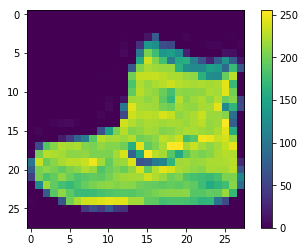

In [9]:


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0


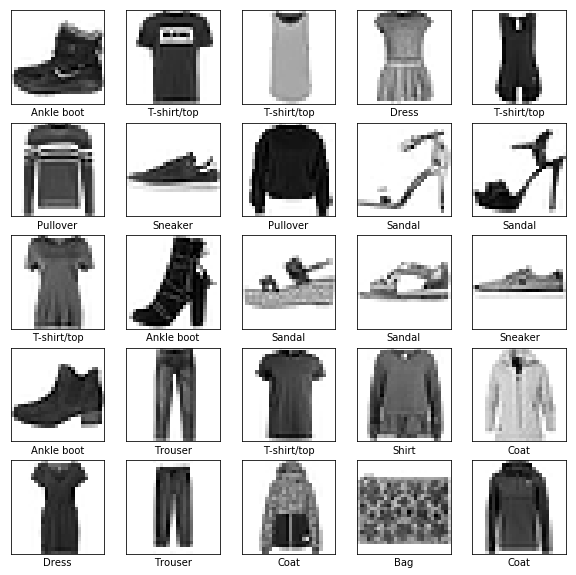

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.4977 - acc: 0.8236
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3739 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3363 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3115 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2938 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2802 - acc: 0.8965
Epoch 7/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2664 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2559 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.2482 - acc: 0.9066
Epoch 10/10
60000/60000 [==============================] - 10s 173us/step - loss: 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 57us/step
Test accuracy: 0.8838


In [16]:
predictions = model.predict(test_images)


In [17]:
predictions[0]


array([7.6339759e-08, 3.4502676e-08, 2.8412997e-10, 9.5625466e-14,
       1.0794968e-08, 5.0410873e-04, 9.4273452e-07, 2.1008137e-03,
       7.4235766e-07, 9.9739325e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])


9

In [19]:
test_labels[0]


9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


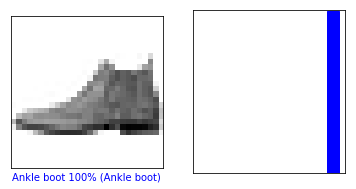

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


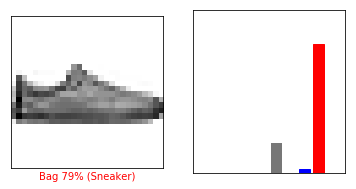

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


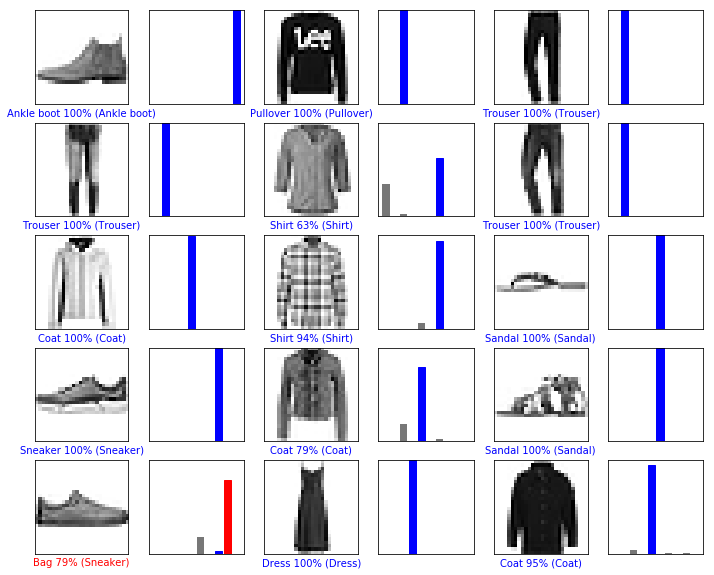

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)


[[7.6339461e-08 3.4502541e-08 2.8412889e-10 9.5624917e-14 1.0794947e-08
  5.0410896e-04 9.4273179e-07 2.1008127e-03 7.4235692e-07 9.9739325e-01]]


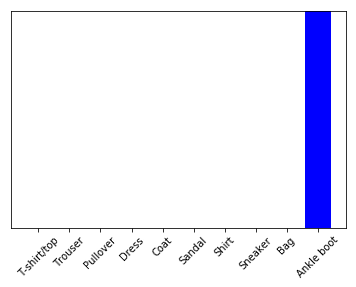

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [29]:
np.argmax(predictions_single[0])


9